In [1]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
X,y = load_boston(return_X_y=True)

In [3]:
x_train = X[0:400, : ]

temp = np.zeros((x_train.shape[0], x_train.shape[1] + 1))
temp[:,0] = np.ones(x_train.shape[0])
temp[:,1:] = x_train
x_train = temp
print(x_train.shape)

(400, 14)


In [4]:
y_train = y[0:400]
y_train.shape

(400,)

In [5]:
x_test = X[400:, :]
temp = np.zeros((x_test.shape[0], x_test.shape[1] + 1))
temp[:,0] = np.ones(x_test.shape[0])
temp[:,1:] = x_test
x_test = temp
print(x_test.shape)

(106, 14)


In [6]:
y_test = y[400:]
y_test.shape

(106,)

In [7]:
scaler = StandardScaler()

#find mu and sigma
scaler.fit(x_train[:,1:])

x_train[:, 1: ] = scaler.transform(x_train[:, 1:])
x_test[:, 1: ] = scaler.transform(x_test[:,1:])

[[1.00000e+00 6.32000e-03 1.80000e+01 ... 1.53000e+01 3.96900e+02
  4.98000e+00]
 [1.00000e+00 2.73100e-02 0.00000e+00 ... 1.78000e+01 3.96900e+02
  9.14000e+00]
 [1.00000e+00 2.72900e-02 0.00000e+00 ... 1.78000e+01 3.92830e+02
  4.03000e+00]
 ...
 [1.00000e+00 7.67202e+00 0.00000e+00 ... 2.02000e+01 3.93100e+02
  1.99200e+01]
 [1.00000e+00 3.83518e+01 0.00000e+00 ... 2.02000e+01 3.96900e+02
  3.05900e+01]
 [1.00000e+00 9.91655e+00 0.00000e+00 ... 2.02000e+01 3.38160e+02
  2.99700e+01]]
[[ 1.         -0.29171468  0.14290806 ... -1.21945879  0.41941166
  -0.92732759]
 [ 1.         -0.28820481 -0.56670438 ... -0.09220903  0.41941166
  -0.3121236 ]
 [ 1.         -0.28820816 -0.56670438 ... -0.09220903  0.3192679
  -1.06781889]
 ...
 [ 1.          0.99011231 -0.56670438 ...  0.98995074  0.32591134
   1.2820829 ]
 [ 1.          6.12025956 -0.56670438 ...  0.98995074  0.41941166
   2.86002199]
 [ 1.          1.36543343 -0.56670438 ...  0.98995074 -1.02590637
   2.76833293]]


In [14]:
theta = np.random.uniform(0,1,size = x_train.shape[1])
epochs = 500
learning_rate = 0.01
m = x_train.shape[0]
n = x_train.shape[1]
iteration = np.arange(epochs)
cost = np.zeros(epochs)


In [15]:
print(theta)
print(cost.shape)

[0.90137347 0.9887296  0.53321833 0.91687569 0.98380481 0.44400122
 0.74411913 0.83596785 0.73504696 0.53658249 0.50078212 0.55962274
 0.98637308 0.45820309]
(500,)


In [16]:
# np.dot(x_train,theta)
theta

array([0.90137347, 0.9887296 , 0.53321833, 0.91687569, 0.98380481,
       0.44400122, 0.74411913, 0.83596785, 0.73504696, 0.53658249,
       0.50078212, 0.55962274, 0.98637308, 0.45820309])

In [17]:
for i in range(epochs):
    y_pred = np.dot(x_train,theta)
    print(y_pred)
    error = y_pred - y_train
    theta = theta - (1/m)*learning_rate*np.dot(x_train.T,error)
    cost[i] = (1/2*m)*np.sum((error)**2)

print(theta)

[-1.73139748e+00 -3.81769127e-01 -5.64924915e-01 -1.35380521e+00
 -7.36871079e-01 -1.41711214e+00 -2.90909046e-01  1.35132293e+00
  1.45128848e+00  7.21099267e-01  1.63651605e+00  4.95141173e-01
 -1.15033210e+00  2.49323647e-01  6.98169265e-01 -1.08314846e-01
 -1.06146598e+00  9.27077662e-01 -3.64476917e+00  1.43799985e-02
  1.07911962e+00  1.12978936e+00  1.87005008e+00  1.79656849e+00
  1.55477349e+00 -1.17641617e+00  8.90371273e-01 -4.89328193e-01
  1.77339158e+00  1.47250685e+00  9.44948201e-01  1.25136556e+00
 -1.95322632e+00  4.89549472e-01 -1.53354093e+00 -9.72649259e-01
 -1.60310522e+00 -1.69284294e+00 -1.90704595e+00 -9.78151945e-01
 -8.73572411e-01 -2.54970251e+00 -3.03462271e+00 -2.61230165e+00
 -1.77542366e+00 -2.32210541e+00 -1.96115249e+00  2.13716454e-01
  8.35802940e-01 -8.41540601e-01 -8.66370141e-01 -5.31028264e-01
 -1.54704730e+00 -1.84649170e+00  2.06768478e+00  7.82744176e-01
  3.44750032e-01  2.88920205e-01 -7.43805514e-02  2.27955453e-01
  9.17293413e-01  1.47133

[ 5.79934343e+00  5.09987077e+00  7.05507710e+00  6.73115624e+00
  7.04390681e+00  5.32039829e+00  4.48899623e+00  4.84810491e+00
  2.43452180e+00  4.49692531e+00  5.25358753e+00  4.92024937e+00
  3.36925533e+00  3.56411136e+00  3.50823856e+00  3.08441181e+00
  2.95012596e+00  2.92182880e+00 -1.33449975e+00  2.35305885e+00
  1.15068161e+00  3.08709321e+00  3.22961382e+00  2.41528336e+00
  3.02499105e+00 -1.53257831e-01  2.50894391e+00  9.75109866e-01
  4.57356816e+00  4.71862722e+00  1.05133053e+00  3.25552144e+00
 -2.30019926e+00  1.20199232e+00 -7.76167134e-01  2.96154871e+00
  2.01799186e+00  2.72766777e+00  2.62139901e+00  7.79171860e+00
  8.95214871e+00  5.36550642e+00  3.83474865e+00  4.07008024e+00
  3.84549848e+00  2.72251484e+00  2.61417856e+00  3.59558846e+00
  1.31442580e+00  2.76013272e+00  4.66921611e+00  5.57493877e+00
  6.42604682e+00  4.91747749e+00  5.99625926e+00  1.11740119e+01
  9.13608569e+00  1.07390209e+01  5.71343209e+00  5.01370355e+00
  4.53847528e+00  4.72431

  4.17622247  1.9963897   0.27683116 -0.85101097]
[10.29497438  8.532988   11.58139845 11.20538683 11.39869435  9.11501884
  7.59125195  7.37372831  3.63408654  7.07284108  7.8151571   7.8405047
  6.22566556  5.98091191  5.82536467  5.4305082   5.63229887  4.79968819
  0.71940039  4.38106145  2.13715678  4.99090413  4.83681374  3.64362263
  4.64945281  1.35633097  4.19494083  2.74872375  6.93595596  7.33165317
  2.03378312  5.257382   -1.3215097   2.55400576  0.85210583  5.77529196
  4.66842248  5.6178673   5.53996097 12.21833019 13.92971192  9.69217373
  7.60112047  7.71788974  7.08637271  5.65940053  5.30687072  5.85563108
  2.03135053  4.96218297  7.66868528  8.96260087 10.62422298  8.45430755
  7.93583168 16.05234863 13.17539804 15.75922637  8.79368197  7.70964672
  6.67158029  6.86996382 10.10548501 10.60010203 12.55841385 12.1381659
  9.70181919  6.98846485  5.38541281  7.01597927  7.72953253  5.67569411
  7.00032807  6.88474082  7.07579724  6.9058997   6.25132051  6.17089863
  6

[ 1.45830828e+01  1.19311598e+01  1.58985628e+01  1.52842297e+01
  1.53970490e+01  1.26305236e+01  1.07203477e+01  1.00583354e+01
  5.17127855e+00  9.73763523e+00  1.05073574e+01  1.08084984e+01
  9.07434478e+00  8.61832695e+00  8.48434845e+00  8.00599575e+00
  8.43887376e+00  7.07251027e+00  3.17573610e+00  6.77235628e+00
  3.72374859e+00  7.31748601e+00  6.91386399e+00  5.40249578e+00
  6.71525355e+00  3.41489647e+00  6.30506757e+00  5.05001548e+00
  9.65953563e+00  1.02835511e+01  3.59839698e+00  7.71538362e+00
  4.03913947e-01  4.47692369e+00  3.18469720e+00  8.80283691e+00
  7.55836223e+00  8.59310542e+00  8.52091599e+00  1.59792206e+01
  1.81601982e+01  1.36125345e+01  1.10373736e+01  1.10360410e+01
  1.01506811e+01  8.46930314e+00  7.90436045e+00  8.19374361e+00
  3.02477662e+00  7.14124496e+00  1.03763298e+01  1.20623938e+01
  1.43121451e+01  1.15587998e+01  9.60356064e+00  1.99058037e+01
  1.63029677e+01  1.97966316e+01  1.15630495e+01  1.02466954e+01
  8.75165286e+00  9.09535

  8.75010281  5.65722057  0.75991917  1.88038969]
[17.78823367 14.54441616 19.13743655 18.27882287 18.34045878 15.24690354
 13.14466572 12.18255352  6.49520558 11.82223931 12.62122219 13.11116185
 11.2791388  10.78456342 10.70851479 10.132473   10.70552432  9.02470339
  5.29679987  8.81243837  5.23693927  9.32145843  8.74099941  7.01362468
  8.52464436  5.27180256  8.14405578  7.0752969  11.93076408 12.72029899
  5.08459712  9.82851814  2.08132053  6.23533055  5.30526474 11.26322281
  9.92715263 10.9678845  10.89190877 18.63150279 21.13368761 16.49239382
 13.58672055 13.49387474 12.46954237 10.62366196  9.90647146 10.04658656
  3.93360893  8.84400328 12.36613174 14.34775595 16.96263178 13.80231159
 10.83129351 22.4639508  18.35089165 22.4979008  13.61782189 12.18672769
 10.38110732 10.88033903 15.43894128 15.75923911 18.30773184 18.27136958
 14.55980064 11.72939959  9.17323516 11.67529017 13.57462835 10.6294083
 12.54330691 12.45535351 12.9760971  12.55742102 11.69073951 11.57390301
 1

 10.74962446  7.41637396  1.65940986  3.39120059]
[20.06663339 16.43635527 21.45141991 20.41095394 20.4343738  17.12674202
 14.90001395 13.72257198  7.48659835 13.33025079 14.14557278 14.77401426
 12.88297025 12.41534913 12.38615688 11.74014228 12.40847912 10.51523654
  6.93740116 10.37343738  6.43853817 10.85155506 10.14402181  8.27150329
  9.91435917  6.71824182  9.55601305  8.63075122 13.63326681 14.53899533
  6.26174838 11.43533609  3.41629712  7.60942545  6.94883035 13.10429518
 11.70900684 12.74025036 12.66017414 20.50136651 23.21943556 18.55326026
 15.42865582 15.26870265 14.1543702  12.20688863 11.38120108 11.41069417
  4.64722682 10.10266013 13.79272611 15.98027009 18.83805675 15.40287817
 11.73788099 24.20566553 19.73795595 24.33284356 15.11400354 13.61913359
 11.59826776 12.21378706 17.11000405 17.3384997  19.94152616 20.02740938
 15.96520664 13.22000767 10.40231815 13.14812391 15.43309494 12.24946733
 14.31978676 14.24137029 14.91275677 14.44127327 13.5465432  13.39945194
 

 12.39382819  8.88663733  2.46544229  4.67569417]
[ 2.18186881e+01  1.79095891e+01  2.32394064e+01  2.20638533e+01
  2.20539591e+01  1.85933172e+01  1.62635565e+01  1.49110487e+01
  8.26107123e+00  1.44952393e+01  1.53166292e+01  1.60600709e+01
  1.41366041e+01  1.37185851e+01  1.37226480e+01  1.30295964e+01
  1.37737921e+01  1.17104252e+01  8.27346035e+00  1.16315398e+01
  7.41948612e+00  1.20776729e+01  1.12686226e+01  9.28834824e+00
  1.10299372e+01  7.89064322e+00  1.06907806e+01  9.87878874e+00
  1.49801427e+01  1.59750723e+01  7.22058905e+00  1.27173460e+01
  4.50514923e+00  8.72286699e+00  8.27110419e+00  1.45717018e+01
  1.31345979e+01  1.41562872e+01  1.40733191e+01  2.19561138e+01
  2.48339569e+01  2.01615530e+01  1.68782396e+01  1.66650388e+01
  1.54797000e+01  1.34645486e+01  1.25535317e+01  1.24833794e+01
  5.22682187e+00  1.11019140e+01  1.49074076e+01  1.72488236e+01
  2.02923649e+01  1.66541778e+01  1.24689678e+01  2.55323871e+01
  2.07923549e+01  2.57225817e+01  1.6301

 13.87098072 10.22196415  3.21133677  5.85317816]
[23.3297086  19.19294193 24.7883461  23.50366341 23.46050333 19.87748953
 17.44736659 15.93205945  8.92892201 15.49823543 16.31788401 17.17031759
 15.23256161 14.87758819 14.90558629 14.18043118 14.99454906 12.77287292
  9.4824066  12.75736778  8.30091343 13.16681956 12.26556103 10.19483872
 12.0207273   8.94156894 11.70047573 10.98751894 16.16325844 17.23553683
  8.08006865 13.85113025  5.48275276  9.71916957  9.44725149 15.87663276
 14.40660776 15.42051868 15.33575524 23.23524737 26.24654981 21.57328482
 18.16080598 17.89999647 16.64881607 14.58447971 13.59738539 13.42386468
  5.74470275 11.98811093 15.8859485  18.35584567 21.56286851 17.75599122
 13.12894836 26.67937077 21.70196071 26.91642502 17.35876605 15.78700507
 13.45197625 14.22155497 19.58276989 19.66334247 22.25728381 22.57898413
 18.02948124 15.4690427  12.28081785 15.3658249  18.22167909 14.71261537
 17.00539636 16.93506127 17.83484309 17.26746474 16.328161   16.15394775
 

 15.1717359  11.40861857  3.87122636  6.90633334]
[24.61910979 20.29769972 26.11567232 24.74536976 24.66904057 20.99028727
 18.46249625 16.79534452  9.49273516 16.34856801 17.15966839 18.11553932
 16.17957368 15.89388258 15.93714039 15.19340533 16.0723981  13.70236182
 10.56237263 13.75037571  9.07810121 14.11906298 13.13399095 10.98794536
 12.88559841  9.86859011 12.58394246 11.95681214 17.18617698 18.32527189
  8.8356971  14.83785275  6.34501368 10.59553192 10.47694626 17.02393202
 15.52874508 16.53710544 16.45165485 24.35318603 27.47492174 22.80170535
 19.28582373 18.98255756 17.66963645 15.57208223 14.51724422 14.23695323
  6.19747999 12.76407815 16.73631622 19.31201301 22.66345675 18.71803438
 13.71595329 27.6648748  22.48051146 27.93601987 18.2911697  16.69284422
 14.22763837 15.04946636 20.59180084 20.60814223 23.16479167 23.61750202
 18.87849431 16.40812405 13.07179506 16.2884951  19.37934288 15.74628275
 18.1289318  18.05873307 19.0506191  18.43165584 17.46878445 17.29448062
 

 15.94811166 12.12198311  4.26161262  7.54223072]
[25.37085365 20.9460333  26.89200931 25.47564512 25.37723114 21.64728104
 19.05617744 17.29289862  9.81610802 16.83985139 17.64202705 18.6642502
 16.73728093 16.49889009 16.54819471 15.79853176 16.71841941 14.25413326
 11.21654865 14.34462489  9.54196566 14.68413269 13.6471503  11.45805092
 13.39759036 10.42303969 13.10817905 12.53206098 17.78726432 18.96593531
  9.28535795 15.42103612  6.86043785 11.11808488 11.08919471 17.71010795
 16.20185329 17.20754295 17.12219117 25.01983915 28.20428222 23.53039775
 19.95779772 19.62866528 18.27646725 16.1644091  15.06836726 14.71512304
  6.46496837 13.22565022 17.23958341 19.87501505 23.31377626 19.29029553
 14.06857183 28.24334483 22.93507151 28.53193628 18.84948899 17.23698755
 14.69306994 15.54212062 21.1897596  21.166365   23.6893922  24.2352667
 19.38626011 16.97224338 13.54837373 16.84140077 20.07341641 16.36934616
 18.80547744 18.73419969 19.78020697 19.12558992 18.14650556 17.97633364
 17

 16.8509412  12.95690233  4.70766069  8.28914113]
[26.22714767 21.68846016 27.77855123 26.31368979 26.18683543 22.4038488
 19.73383434 17.851798   10.17656522 17.39295035 18.18036333 19.28546438
 17.37824366 17.20015801 17.25315488 16.50239162 17.47255543 14.89167147
 11.98854752 15.03714805 10.08028299 15.33694606 14.23709016 11.9998293
 13.98719176 11.06862966 13.71338559 13.19688606 18.47504508 19.69969432
  9.80547559 16.09219636  7.46022936 11.72449434 11.79865997 18.51084759
 16.98958217 17.99267989 17.90803785 25.7965133  29.05059774 24.37413904
 20.74095538 20.38094751 18.98010059 16.8572997  15.71219582 15.26301356
  6.77148468 13.76036725 17.82040882 20.52180429 24.06388437 19.95444135
 14.47917283 28.90623803 23.45214578 29.21285989 19.50051122 17.87357719
 15.23641878 16.11293268 21.88032157 21.80865509 24.27953042 24.95326245
 19.97921559 17.6322064  14.10697381 17.48663649 20.88494821 17.10131046
 19.59975335 19.52591254 20.63415201 19.93229038 18.9319574  18.77133467
 18

[26.99230788 22.35546844 28.57262998 27.06842117 26.91220949 23.08799249
 20.34035713 18.34089334 10.48782595 17.87822058 18.64704584 19.83504726
 17.95693604 17.83853609 17.89126848 17.14606435 18.16557608 15.46953615
 12.70835811 15.67220894 10.57055936 15.92873296 14.76809542 12.48873352
 14.51896163 11.65987181 14.26105677 13.80007203 19.09085938 20.35783536
 10.27694998 16.69772125  8.00921543 12.27730937 12.44523776 19.24808075
 17.71741924 18.71840552 18.63510912 26.5108201  29.82516032 25.14318258
 21.46050816 21.07112408 19.6221823  17.49677399 16.30518853 15.75480582
  7.04532415 14.24692677 18.347068   21.10516115 24.74423712 20.5612789
 14.85307883 29.50233217 23.91141307 29.824059   20.09764056 18.46015263
 15.73517293 16.63237468 22.50652884 22.38771012 24.79540765 25.61159467
 20.52586664 18.24021156 14.6222544  18.07916159 21.6333034  17.77999707
 20.3358398  20.25815924 21.42288373 20.67090872 19.64852468 19.50204809
 18.76925906 18.41206341 25.1419016  24.0229524  22.

 18.38543736 14.39235232  5.42696113  9.58068585]
[ 2.76299497e+01  2.29138865e+01  2.92354627e+01  2.77016402e+01
  2.75169915e+01  2.36644989e+01  2.08461915e+01  1.87372869e+01
  1.07351130e+01  1.82724974e+01  1.90205247e+01  2.02866024e+01
  1.84444076e+01  1.83796005e+01  1.84288234e+01  1.76945928e+01
  1.87596467e+01  1.59567871e+01  1.33363258e+01  1.62154194e+01
  1.09859750e+01  1.64279988e+01  1.52119790e+01  1.28983764e+01
  1.49644124e+01  1.21647195e+01  1.47216818e+01  1.43096678e+01
  1.96028621e+01  2.09065231e+01  1.06739924e+01  1.72058340e+01
  8.47785537e+00  1.27467337e+01  1.29951038e+01  1.98832979e+01
  1.83470456e+01  1.93460792e+01  1.92646138e+01  2.71261788e+01
  3.04888732e+01  2.57979027e+01  2.20785298e+01  2.16627740e+01
  2.01691996e+01  1.80487871e+01  1.68157265e+01  1.61653454e+01
  7.27143598e+00  1.46593305e+01  1.87923120e+01  2.15956231e+01
  2.53202149e+01  2.10791195e+01  1.51679816e+01  3.00018112e+01
  2.42892764e+01  3.03363964e+01  2.0608

 18.91364682 14.89279923  5.65451353 10.03362374]
[28.09302929 23.3208157  29.71713927 28.16375006 27.95524628 24.08707716
 21.21351286 19.01564944 10.90423551 18.54994845 19.27868347 20.60877565
 18.80219046 18.77793834 18.82218425 18.10086475 19.20251597 16.31350123
 13.81368778 16.61960882 11.2915706  16.7938797  15.53376391 13.19592316
 15.28796812 12.53958672 15.05776199 14.68381874 19.97205464 21.30360751
 10.96393617 17.57607965  8.82590758 13.09319489 13.40226489 20.36086393
 18.82236102 19.81950249 19.73993511 27.58920719 30.98557804 26.28360061
 22.54118173 22.10468712 20.57511875 18.46425522 17.19881468 16.46310406
  7.43270189 14.96320201 19.11994172 21.95459851 25.74501854 21.46412225
 15.39673935 30.36608915 24.5583022  30.71118886 20.98737259 19.34196589
 16.47856609 17.3971294  23.4238312  23.22532779 25.49924186 26.60046167
 21.35362668 19.15320878 15.39600649 18.9640805  22.76309853 18.81293157
 21.45577272 21.36876998 22.61766957 21.77369756 20.71289052 20.60038481
 

 19.35193855 15.31148217  5.83038463 10.41393968]
[28.46677428 23.6499895  30.10573448 28.5377673  28.3072243  24.43062416
 21.50974393 19.23173244 11.03120631 18.76564437 19.47523508 20.86340092
 19.09397143 19.10272276 19.14101123 18.4342903  19.56850404 16.60264731
 14.2165593  16.9531444  11.54051082 17.09089564 15.79178049 13.43489902
 15.54786661 12.84819761 15.32903385 14.98823586 20.26649063 21.6217207
 11.19812429 17.87484059  9.11265816 13.37661893 13.73695723 20.76014195
 19.22140659 20.21634854 20.1388054  27.97705441 31.39937178 26.68381969
 22.92592207 22.47126654 20.90961222 18.81174924 17.51817894 16.70247171
  7.55951743 15.21144884 19.38756409 22.24631026 26.09303056 21.7820729
 15.57954694 30.66104976 24.76968233 31.01640149 21.29963682 19.65522318
 16.73948509 17.66226273 23.74001833 23.508743   25.71848405 26.95405049
 21.65220872 19.47667602 15.66963286 19.27558464 23.16743482 19.18578021
 21.86001885 21.76828059 23.0472442  22.1636378  21.08739792 20.9919738
 20.

 19.69937829 15.64620513  5.95829715 10.71911903]
[28.75448164 23.90374403 30.40444832 28.82595403 28.57606486 24.69659987
 21.73749192 19.39057261 11.12059152 18.9243319  19.6161817  21.05456188
 19.32104298 19.35457758 19.38674781 18.6947539  19.85658408 16.82546068
 14.54111909 17.21541926 11.73340441 17.3202369  15.98816398 13.61706246
 15.74600878 13.09021423 15.53697461 15.2239276  20.48926751 21.86377389
 11.37775962 18.10400733  9.33784454 13.5973832  13.99933084 21.07921786
 19.54166889 20.53414163 20.45857712 28.28791071 31.72914381 26.99848871
 23.23135225 22.76147285 21.1725891  19.08938609 17.77243832 16.88557641
  7.65385702 15.4046218  19.59602565 22.47233337 26.36503489 22.03268818
 15.71743705 30.88875416 24.9267812  31.25405394 21.54444427 19.90316361
 16.94409344 17.8686765  23.98511627 23.72509726 25.8746885  27.23635095
 21.89199194 19.73194472 15.8851133  19.52031624 23.4894266  19.48433296
 22.18374193 22.08750296 23.39052421 22.47177197 21.38256489 21.3032598
 2

 20.0189007  15.95689857  6.0637099  11.00354356]
[29.01047392 24.12968733 30.66953868 29.08207764 28.81249609 24.93429591
 21.93979346 19.52398348 11.19130006 19.05760395 19.73058719 21.21941559
 19.52559341 19.57970139 19.60495341 18.92962546 20.11864394 17.02322053
 14.84443002 17.45390635 11.9057729  17.52436091 16.15988909 13.77659253
 15.91954328 13.30956297 15.72027364 15.43440528 20.68267163 22.07546963
 11.53625513 18.30638782  9.54240621 13.79596017 14.2373355  21.37531052
 19.84025542 20.82951901 20.75615327 28.5776279  32.03456895 27.2849545
 23.51241386 23.0276697  21.41199125 19.3468231  18.00726816 17.0470536
  7.73410634 15.57829551 19.78388174 22.67482728 26.61110921 22.26156859
 15.83603867 31.09197145 25.06009146 31.46878927 21.7661684  20.13039124
 17.12955661 18.05441638 24.20445218 23.91494845 25.99953124 27.49834139
 22.11600147 19.96486861 16.08117962 19.74249746 23.78667969 19.76160302
 22.48441494 22.38328951 23.70870898 22.75387567 21.65217485 21.5902313
 20.

 20.27125142 16.20481642  6.13585827 11.23154341]
[29.20508959 24.30148118 30.87025789 29.27607974 28.98927974 25.11554772
 22.09329229 19.61818047 11.23702733 19.15155933 19.80744293 21.33988076
 19.68338664 19.75110738 19.76986401 19.11038204 20.3224051  17.17257811
 15.08785393 17.6394124  12.0370961  17.67911767 16.28721782 13.89507455
 16.04840144 13.47951268 15.85746711 15.59464506 20.82474355 22.23251701
 11.65506425 18.4583664   9.70145357 13.94850381 14.42216774 21.61154284
 20.07970566 21.06543448 20.99413865 28.81015952 32.27799338 27.50835832
 23.73430224 23.23704338 21.59872827 19.55193435 18.1935481  17.16839693
  7.79166023 15.71174376 19.92879037 22.82998691 26.80173655 22.44081807
 15.92163511 31.24706556 25.1551161  31.63548915 21.93777029 20.30886337
 17.27334102 18.19734416 24.37199762 24.05631852 26.08077592 27.70764048
 22.29633448 20.14666569 16.23367076 19.91490153 24.02214019 19.98271
 22.72418979 22.61855563 23.96191995 22.9753089  21.86339677 21.81733109
 20.

[29.36773319 24.44501065 31.03706571 29.43713321 29.13374433 25.26723702
 22.22133052 19.68982935 11.26742691 19.22274518 19.86167439 21.43572392
 19.81755109 19.89403039 19.90624398 19.26306552 20.49656015 17.2959938
 15.303606   17.79820449 12.14684483 17.80764836 16.39008373 13.99097848
 16.1526309  13.62432494 15.96951886 15.72840923 20.93811668 22.3594819
 11.75234686 18.58313735  9.83765414 14.07726429 14.58029403 21.82000911
 20.29217533 21.27370662 21.20453164 29.01694322 32.49281333 27.70037006
 23.92763489 23.41871434 21.75932559 19.73259234 18.35685667 17.26839726
  7.8363862  15.82453889 20.05196404 22.96087741 26.96446431 22.59573481
 15.98797188 31.3773935  25.22797186 31.7786978  22.08377309 20.46345794
 17.39605424 18.31842558 24.51256249 24.17112171 26.13455664 27.89283929
 22.45729546 20.3027841  16.36408395 20.06198355 24.22800871 20.17746072
 22.93535659 22.82518187 24.18443912 23.16702899 22.04603492 22.0158065
 20.92039201 20.8562993  27.63944829 26.29275563 24.59

 20.66615559 16.59928138  6.22020571 11.59711202]
[29.49043051 24.55324171 31.16197464 29.55738519 29.23950566 25.38164411
 22.31777479 19.73755739 11.28342092 19.26978256 19.89355358 21.50365533
 19.92090924 20.00113584 20.0074898  19.37932479 20.63100157 17.38753119
 15.47730387 17.92115025 12.2294814  17.90363089 16.46423777 14.06028646
 16.22783597 13.73585372 16.05136424 15.82893611 21.01846193 22.45107036
 11.82370461 18.67497496  9.94328036 14.1753948  14.7028112  21.98738401
 20.46377119 21.44087289 21.37365033 29.18456    32.66549216 27.84987969
 24.08051667 23.56170611 21.88453655 19.87728991 18.48701758 17.34261985
  7.86718773 15.91074666 20.14682793 23.06079956 27.09029531 22.71724215
 16.03281144 31.47652328 25.2767805  31.89071636 22.19600505 20.584923
 17.4908589  18.41128067 24.61896786 24.25442566 26.16187119 28.04216053
 22.58836533 20.42402554 16.46488743 20.17535302 24.39139458 20.33330453
 23.10427683 22.98998544 24.36202234 23.31757623 22.18936526 22.17334849
 21

[29.58764819 24.63898135 31.26002922 29.65129781 29.32010057 25.47211666
 22.39414129 19.76955288 11.28975652 19.30082066 19.91040217 21.55341496
 20.00489815 20.08501062 20.08593172 19.47215428 20.74004945 17.45838741
 15.62503018 18.02134774 12.29473144 17.9785928  16.51961076 14.1122167
 16.28401537 13.82620902 16.1134657  15.90806453 21.0770288  22.51948286
 11.87821459 18.74542104 10.02964218 14.25399191 14.80288612 22.12960456
 20.61047154 21.58276078 21.51741358 29.32859082 32.81256253 27.97260702
 24.20817376 23.68050219 21.9875443  19.99989589 18.59676121 17.40039239
  7.88900602 15.98012099 20.22391639 23.1411832  27.19288667 22.8179102
 16.06309048 31.55602135 25.30954521 31.98363388 22.28672159 20.68568187
 17.56806396 18.48636331 24.70356367 24.31715624 26.17073612 28.16976085
 22.70159655 20.52310062 16.54684121 20.2672206  24.52833331 20.46510814
 23.24704593 23.12885263 24.51172436 23.44233431 22.30817837 22.30548838
 21.13953551 21.140328   27.91569231 26.53006091 24.8

[29.67404582 24.71523003 31.34606868 29.73295324 29.38776664 25.55218368
 22.46207347 19.79124874 11.28811757 19.32108001 19.9155176  21.59289172
 20.08213833 20.15807174 20.1533156  19.55521365 20.83961007 17.51920312
 15.7681481  18.1135431  12.35242335 18.04378541 16.56470445 14.15474222
 16.32974207 13.9087454  16.16520137 15.97764104 21.12283523 22.57515671
 11.92417674 18.80513733 10.10958505 14.32479998 14.89540209 22.26754714
 20.75375158 21.72008742 21.65679284 29.4702836  32.95576521 28.08664871
 24.32930771 23.79254851 22.0836245  20.11840234 18.70226261 17.45068018
  7.90559131 16.04312048 20.29486772 23.21421999 27.28753498 22.91266809
 16.08342759 31.6280712  25.33155501 32.07165122 22.36933835 20.78061672
 17.63921435 18.55505138 24.77908514 24.36889356 26.16315363 28.29449841
 22.81374865 20.61449282 16.62198508 20.35108113 24.65883317 20.59209913
 23.38444356 23.26203435 24.65532471 23.55964831 22.42007306 22.43160755
 21.22918182 21.26401824 28.03406503 26.62952601 24

 21.05864703 17.00492873  6.24629538 11.9794379 ]
[29.7338558  24.76815202 31.40462995 29.78769761 29.43086739 25.60722939
 22.50928446 19.80023598 11.28053771 19.3284518  19.91011903 21.61594434
 20.13811494 20.20707087 20.19767938 19.613028   20.91071372 17.55921993
 15.87802166 18.1801738  12.39211056 18.08753129 16.59208976 14.18082091
 16.35744535 13.96788478 16.19771937 16.02506068 21.14867714 22.60886057
 11.9536975  18.8437459  10.1679335  14.37470649 14.96280201 22.37382803
 20.86498354 21.8255448  21.76402261 29.58131428 33.06671016 28.17012747
 24.42021924 23.87605633 22.15437194 20.20934479 18.78277303 17.48471228
  7.91476553 16.08807921 20.34640269 23.26642442 27.35632187 22.98323686
 16.0912117  31.67950292 25.34020159 32.1380391  22.42830935 20.85136957
 17.6909086  18.60460378 24.83172921 24.40096339 26.14347572 28.39156961
 22.90234445 20.68067965 16.67603484 20.41103987 24.75724508 20.68910352
 23.48921085 23.36320486 24.76437926 23.64677242 22.50343428 22.5269442
 2

 21.13192288 17.08329228  6.24063452 12.05463046]
[29.77145575 24.80159148 31.44075378 29.82078493 29.45525078 25.64153688
 22.53918041 19.80169568 11.27133529 19.32840408 19.90043808 21.62745178
 20.17517229 20.23663762 20.22387553 19.64949752 20.95683505 17.58285058
 15.9547675  18.2240304  12.41691733 18.11402231 16.60656722 14.19482568
 16.37201146 14.00648286 16.21576123 16.05432754 21.16068204 22.62654474
 11.97063219 18.86604746 10.2068286  14.40674157 15.00762937 22.44845393
 20.94362387 21.89930792 21.83914815 29.6605719  33.14508503 28.22583108
 24.48241386 23.93280451 22.20192521 20.27296213 18.83882453 17.50568685
  7.91907635 16.11739048 20.38064789 23.3005388  27.40195298 23.03122599
 16.09148347 31.71312731 25.34092048 32.18395348 22.46664237 20.89951085
 17.7252383  18.63733152 24.86514022 24.41844544 26.12071118 28.46042707
 22.96608521 20.7242955  16.71142457 20.45003053 24.82487694 20.75661156
 23.5619664  23.43322183 24.83979238 23.70577092 22.56012865 22.59264682
 

 21.20955012 17.16773438  6.2292895  12.1364203 ]
[29.80697613 24.8334864  31.47405786 29.85034353 29.4748747  25.67356832
 22.56779394 19.79797898 11.25729003 19.32259862 19.88355724 21.63468032
 20.21260398 20.26292845 20.24646316 19.6840177  21.00205522 17.60324906
 16.0368326  18.2679017  12.44023419 18.13778496 16.61684264 14.20510369
 16.38220543 14.04473292 16.22978028 16.08130922 21.16669547 22.63884353
 11.98464343 18.88465649 10.24643488 14.43788073 15.05313472 22.52883914
 21.02893345 21.97838158 21.91981547 29.74750051 33.23012154 28.28248517
 24.54748885 23.99174754 22.25076793 20.34122099 18.89869147 17.52514449
  7.92155566 16.14650176 20.41545328 23.33453337 27.44811899 23.0811865
 16.08585019 31.7467198  25.33571201 32.23286192 22.50444638 20.94966125
 17.76008005 18.67040221 24.89718529 24.43163887 26.08615487 28.53545692
 23.03659108 20.76794098 16.74659665 20.48843591 24.89598932 20.82859188
 23.63932785 23.50740774 24.91957637 23.7668093  22.61914183 22.66197396
 2

 21.27818491 17.24394739  6.21367332 12.21110275]
[29.83362335 24.85790201 31.49810224 29.87042424 29.48543403 25.69714828
 22.58982959 19.78914031 11.24044719 19.31133017 19.86160499 21.63576768
 20.24374565 20.28057007 20.26075016 19.70992324 21.03787383 17.61620587
 16.1100526  18.30378646 12.45766781 18.15409064 16.6204465  14.20927185
 16.38551979 14.07564399 16.23660471 16.1007765  21.16470316 22.6426875
 11.99279908 18.89564329 10.27976534 14.4623833  15.091242   22.60134673
 21.10652107 22.04923015 21.99222908 29.82767644 33.30756407 28.32992233
 24.60405156 24.0425098  22.29228613 20.40250663 18.95217981 17.53950656
  7.92173672 16.17021324 20.44472976 23.36236706 27.48657874 23.12442431
 16.07433443 31.77439908 25.32464702 32.27664497 22.53479034 20.99310699
 17.78931404 18.69806033 24.9219332  24.43754203 26.04427859 28.60412608
 23.10229286 20.80360704 16.77509571 20.5191272  24.9581814  20.89267245
 23.70792373 23.57291325 24.98983235 23.81910449 22.67018302 22.72290176
 2

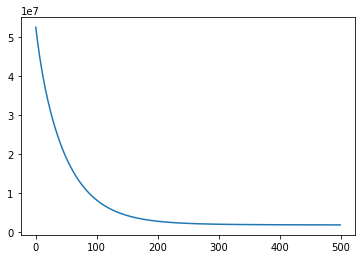

In [18]:
plt.plot(iteration, cost)

https://euanrussano.github.io/20190810linearRegressionNumpy/